Data already loaded: Jan-16 09:54


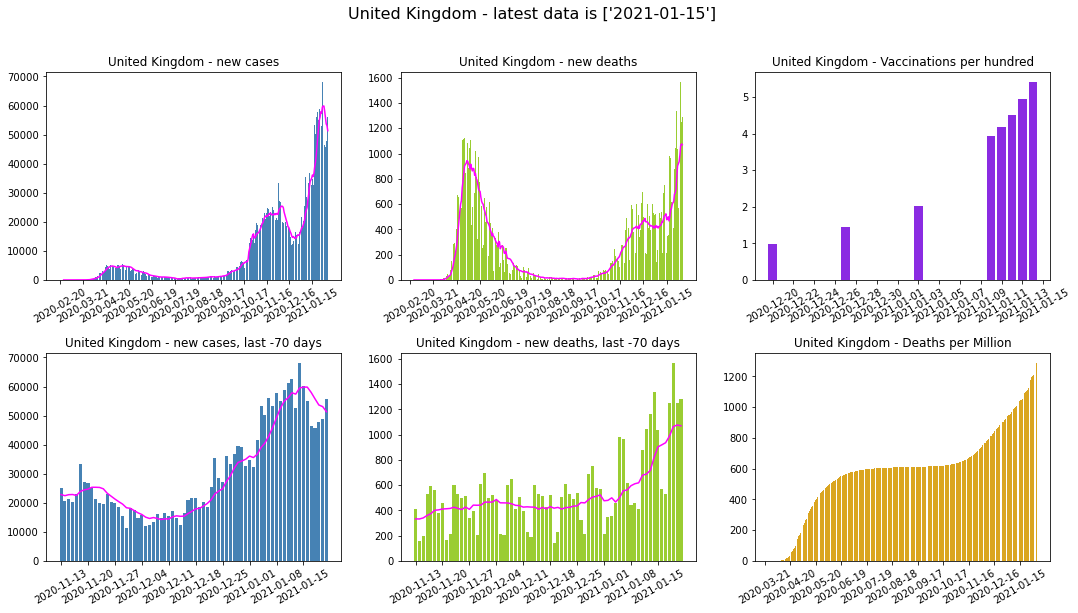

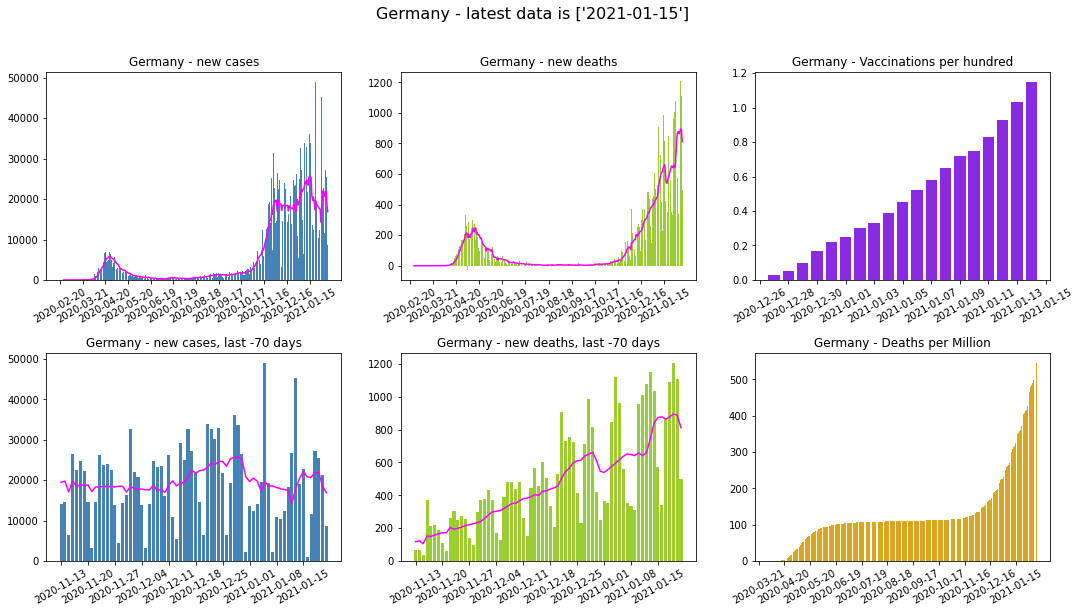

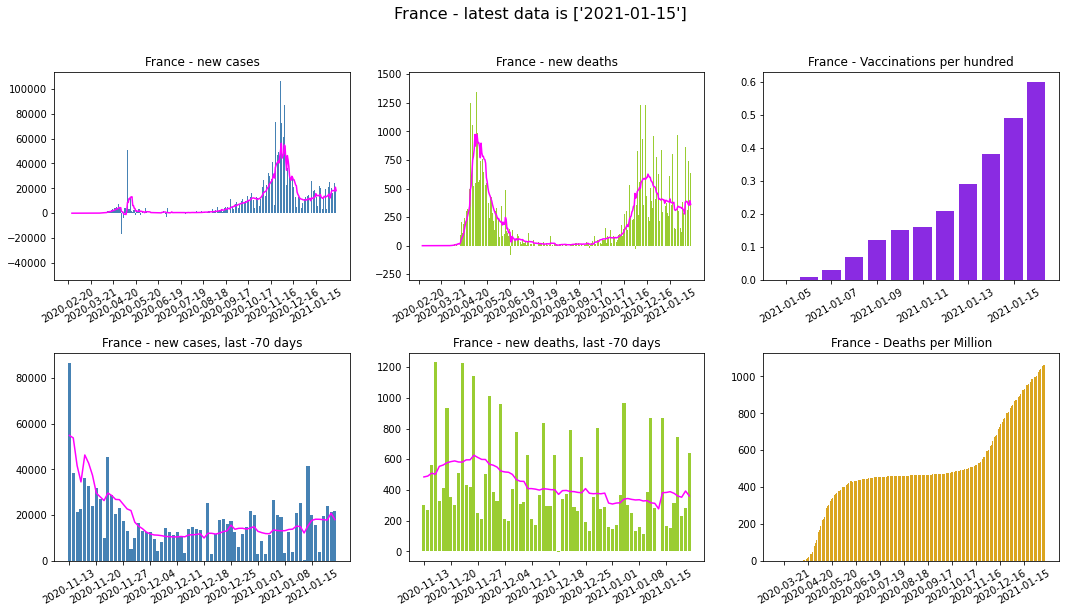

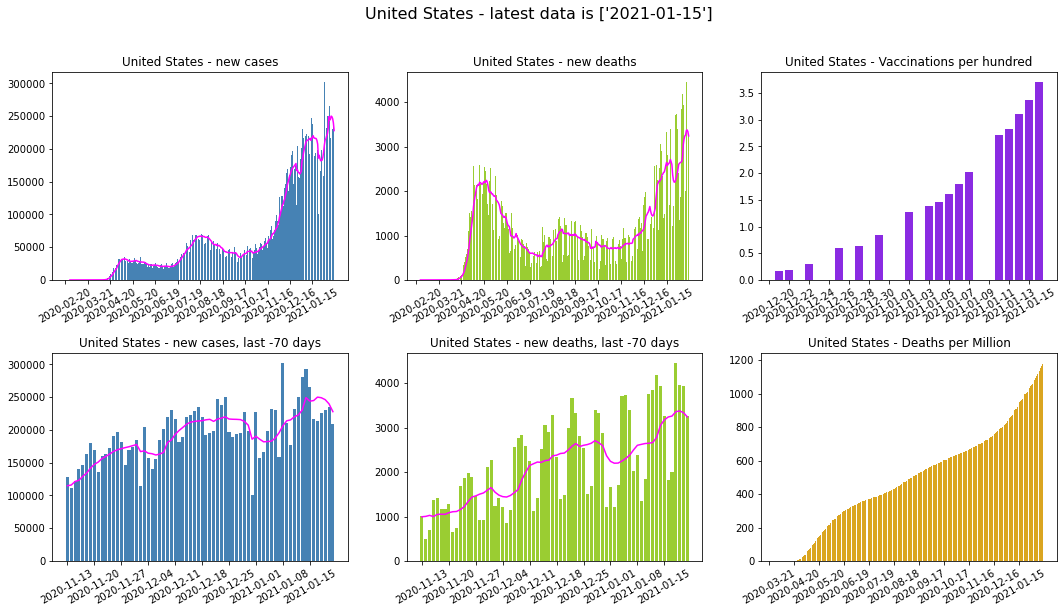

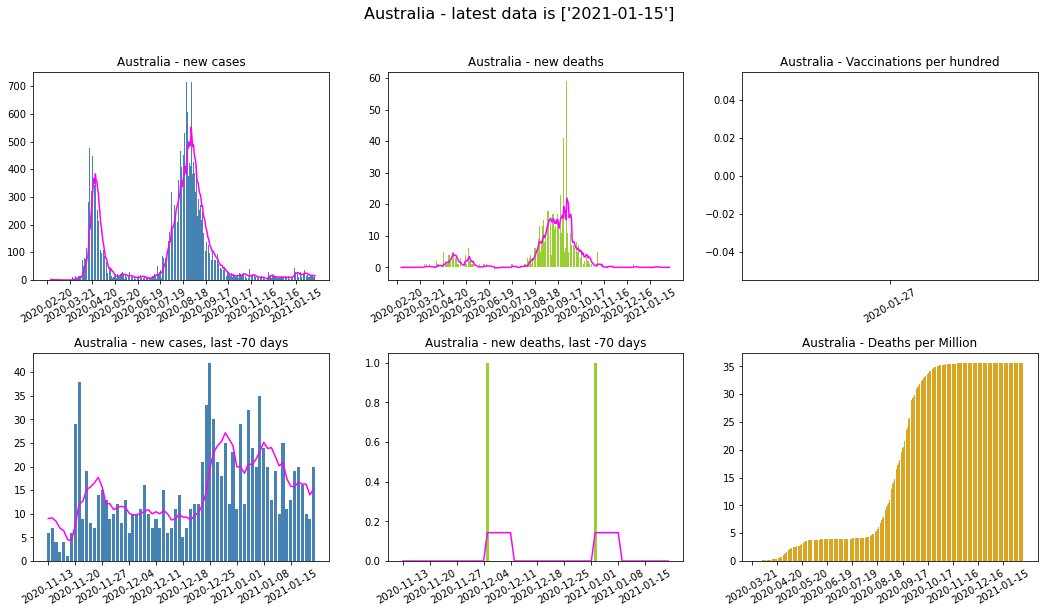

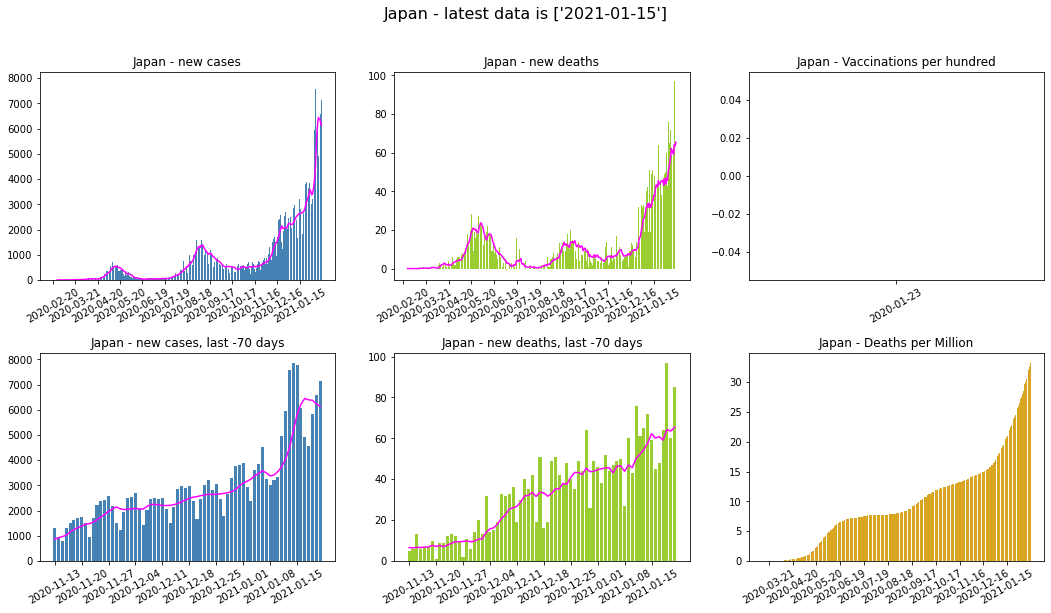

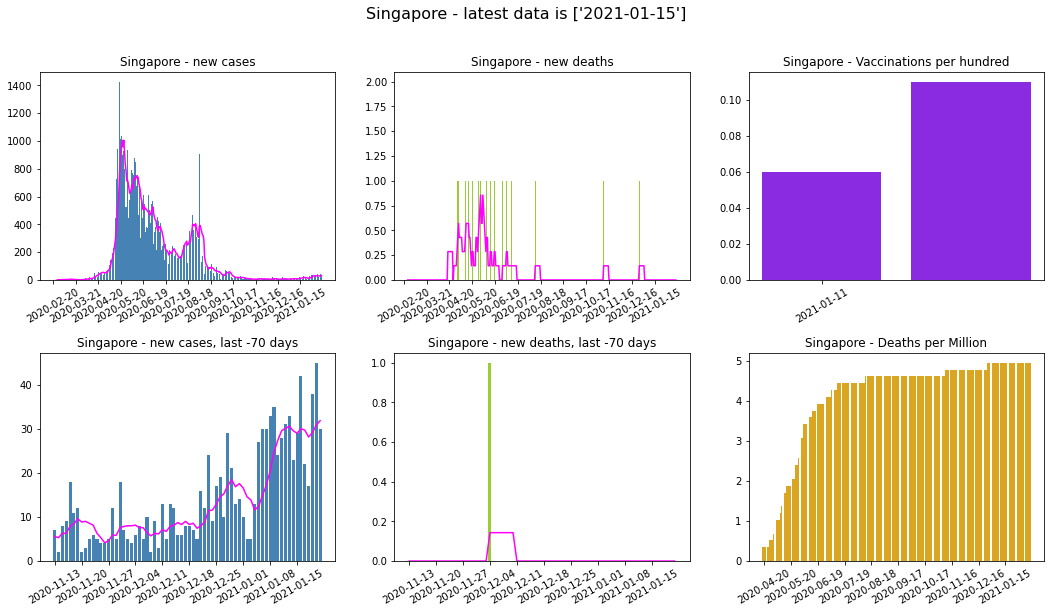

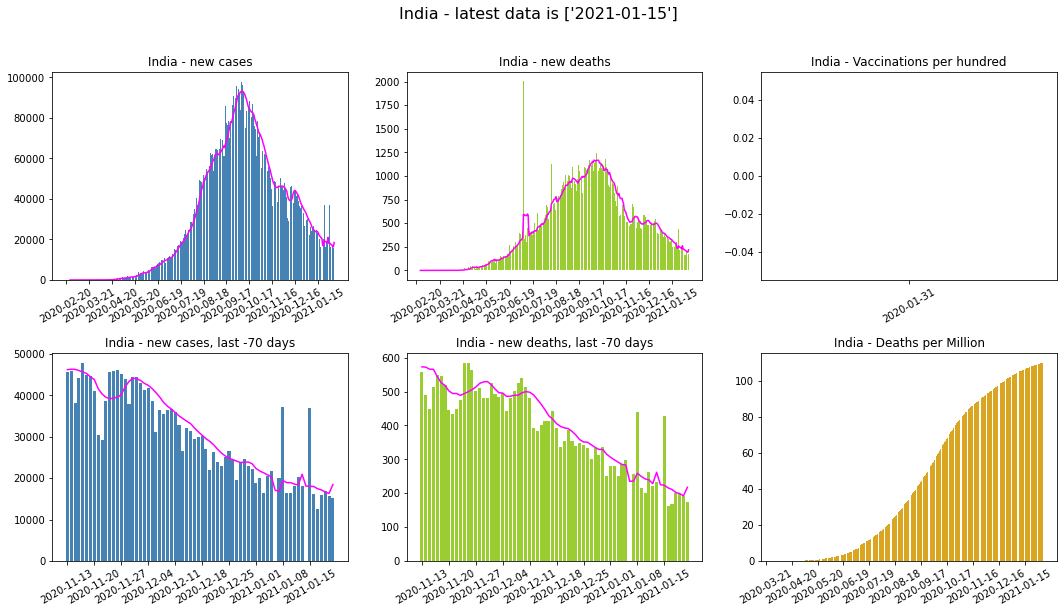

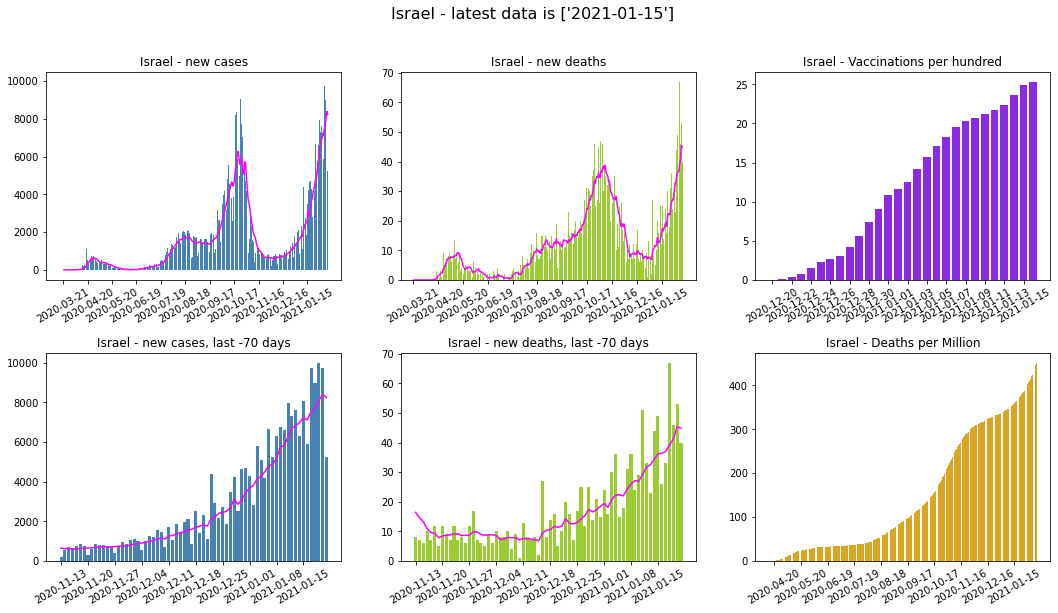

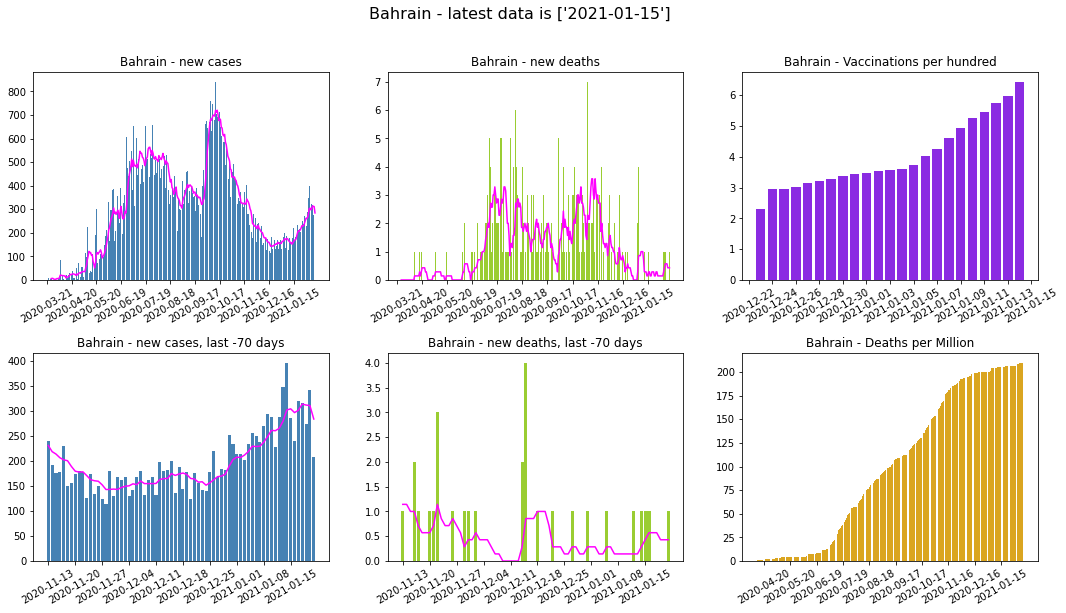

In [14]:
# Data from https://covid.ourworldindata.org/data/owid-covid-data.csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pathlib import Path

downloads = f'{Path.home()}\\Downloads'

ageData = dt.timedelta(hours=1, minutes=0)    # this sets up how old the data can be before we load it again.
try:
    if dataStamp + ageData < dt.datetime.today():
        load = True
        print('Data will be reloaded')
    else:
        load = False
        print(f'Data already loaded: {dataStamp.strftime("%b-%d %H:%M")}')
except:
    load = True

# Load the data
if load:
    print('Loading data')
    df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    dataStamp = dt.datetime.today()

df.sort_values(by = 'date', inplace=True)    # Make sure it is in date order.

xrot = 30    # this just shifts the date labels so they can be read

# list the iso country codes that we want to report on
for country in ['GBR', 'DEU', 'FRA', 'USA', 'AUS', 'JPN', 'SGP', 'IND', 'ISR', 'BHR']:
    df1 = df[df.iso_code == country]    # subset the data
    for name in df[df.iso_code == country]['location'][0:1]:
        pass     # just pass the name back
    x = []    # setup an empty array for the X values
    for date in df1.date.tolist():    # pop each date into the x-axis
        x.append(date)
    
    plt.rcParams["figure.figsize"] = (18,9)    # Create the Plot size
    fig , ax = plt.subplots(2,3)    # Create the plot space
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35) # add horizontal spacing
    fig.suptitle(f"{name} - latest data is {x[-1:]}", fontsize=16)    # title the figure
    
    ticks = []    # empty array of tick positions
    i, step = 0, 30    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position
    y1 = df1.new_cases    # set the y axis values
    y2 = df1.new_cases_smoothed
    y3 = df1.new_deaths
    y4 = df1.new_deaths_smoothed
    y5 = df1.total_vaccinations_per_hundred
    y6 = df1.total_deaths_per_million
    
    plt.subplot(231)    # top left
    plt.title(f"{name} - new cases")
#    plt.xticks(ticks, x[::step], rotation=xrot)
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.bar(x, y1, color='steelblue')
    plt.plot(x, y2, color='magenta')

    plt.subplot(232)    # top centre
    plt.title(f"{name} - new deaths")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.bar(x, y3, color='yellowgreen')
    plt.plot(x, y4, color='magenta')

    plt.subplot(236)    # bottom right
    plt.title(f"{name} - Deaths per Million")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.bar(x, y6, color='goldenrod')

    ### This is for the vaccinations, as we have less data we need more frequent data labels. 
    ticks = []    # empty array of tick positions
    i, step = 0, 2    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position

    plt.subplot(233)    # top right
    plt.title(f"{name} - Vaccinations per hundred")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.xticks(rotation=xrot)
    plt.bar(x, y5, color='blueviolet')

    ### This section just slices the same date but only the last 35 values
    recent = -70    # this sets the look back value
    i, step = 0, 7
    ticks = []
    for tick in x[recent::step]:
        ticks.append(i)
        i += step

    plt.subplot(234)    # bottom left
    plt.title(f"{name} - new cases, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.bar(x[recent:], y1[recent:], color='steelblue')
    plt.plot(x[recent:], y2[recent:], color='magenta')

    plt.subplot(235)    # bottom centre
    plt.title(f"{name} - new deaths, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot)
    plt.bar(x[recent:], y3[recent:], color='yellowgreen')
    plt.plot(x[recent:], y4[recent:], color='magenta')

    fig.savefig(f'{downloads}\\{country}_OWD.png')

ARG


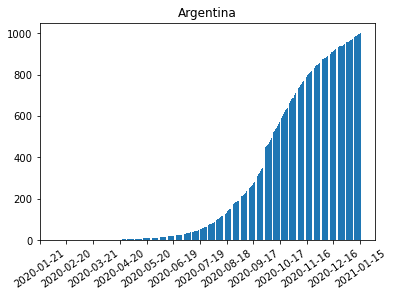

In [2]:
i = 0
for country in df.iso_code.unique():
    print(country)
    if pd.isna(country):
        pass
    else:
        df1 = df.loc[df.iso_code == country]
        plt.rcParams["figure.figsize"] = (6,4)
        plt.bar(df1.date, df1.total_deaths_per_million)
        plt.xticks(df1.date[-(df1.date.size//30) * 30 -1 ::30] ,  rotation=35)
        plt.title(df1.location.unique()[0])
        plt.show()
        i += 1
    if i == 1: break

In [3]:
for code in df.iso_code.unique():
    if not pd.isna(code):
        print(code)

ARG
MEX
THA
TWN
KOR
JPN
OWID_WRL
USA
CHN
VNM
SGP
FRA
CHE
MYS
NPL
AUS
CAN
ISR
KHM
DNK
DEU
LKA
FIN
ARE
IND
PHL
FJI
HKG
GBR
ITA
RUS
ESP
SWE
LVA
PRT
CZE
SVN
GRC
BEL
MLT
MAR
ZAF
EGY
NLD
GTM
IRN
LBN
CHL
NOR
LTU
KWT
AFG
OMN
BHR
LUX
IRQ
AUT
DZA
HRV
PAK
SRB
EST
BRA
MKD
GEO
ROU
SMR
ISL
NGA
NZL
BLR
SEN
QAT
IRL
MCO
AZE
ECU
DOM
ARM
AND
SAU
IDN
JOR
BGD
UKR
TUN
TGO
POL
HUN
LBY
LIE
BIH
PSE
CRI
PER
COL
BTN
SVK
CMR
VAT
KEN
PRY
BGR
MDV
MDA
CYP
BRN
PAN
ALB
BFA
MNG
TUR
HND
CIV
COD
BOL
JAM
CUB
GUY
GIN
KAZ
SDN
ATG
ETH
URY
RWA
GHA
GAB
VEN
SWZ
SUR
SYC
NAM
TTO
LCA
MRT
VCT
OWID_KOS
COG
UZB
GNQ
CAF
BEN
BHS
SOM
TZA
LBR
BRB
GMB
MNE
DJI
MUS
ZMB
KGZ
TCD
SLV
NIC
HTI
CPV
NER
AGO
MDG
ZWE
PNG
ERI
UGA
TLS
SYR
MOZ
DMA
GRD
BLZ
LAO
GNB
KNA
MLI
MMR
MWI
BWA
SLE
BDI
SSD
STP
YEM
TJK
COM
LSO
SLB
MHL
VUT
WSM


In [4]:
df = df.loc[df.iso_code != 'OWID_WRL']
for item in ['total_vaccinations_per_hundred', 'total_deaths_per_million', 'total_cases_per_million',
            'icu_patients_per_million', 'total_tests_per_thousand', 'new_deaths_per_million']:
    print('####')
    print(df.loc[df[item].idxmax()][['location',item]])

####
location                          Israel
total_vaccinations_per_hundred     25.34
Name: 26665, dtype: object
####
location                    San Marino
total_deaths_per_million       1915.26
Name: 46243, dtype: object
####
location                   Andorra
total_cases_per_million     115783
Name: 1285, dtype: object
####
location                    Belgium
icu_patients_per_million    127.183
Name: 5461, dtype: object
####
location                    Luxembourg
total_tests_per_thousand       2838.98
Name: 32363, dtype: object
####
location                  Ecuador
new_deaths_per_million    218.329
Name: 16118, dtype: object


In [5]:
df.loc[df.iso_code == 'GBR'][['date','new_deaths']].sort_values(by=['new_deaths'], ascending=False)[:5]

,date,new_deaths
57033,2021-01-13,1568.0
57028,2021-01-08,1333.0
57035,2021-01-15,1285.0
57034,2021-01-14,1253.0
57032,2021-01-12,1246.0


In [6]:
df.loc[df.iso_code == 'GBR'][['date','new_cases']].sort_values(by=['new_cases'], ascending=False)[:5]

,date,new_cases
57028,2021-01-08,68192.0
57026,2021-01-06,62556.0
57025,2021-01-05,61087.0
57029,2021-01-09,60098.0
57024,2021-01-04,58923.0


In [7]:
i = df.loc[df.iso_code == 'GBR'].last_valid_index()
df.loc[i]

iso_code                                            GBR
continent                                        Europe
location                                 United Kingdom
date                                         2021-01-15
total_cases                                 3.32564e+06
new_cases                                         55885
new_cases_smoothed                              51342.6
total_deaths                                      87448
new_deaths                                         1285
new_deaths_smoothed                                1069
total_cases_per_million                         48988.6
new_cases_per_million                           823.218
new_cases_smoothed_per_million                  756.306
total_deaths_per_million                        1288.16
new_deaths_per_million                           18.929
new_deaths_smoothed_per_million                  15.747
reproduction_rate                                   NaN
icu_patients                                    

In [8]:
df.loc[i]

iso_code                                            GBR
continent                                        Europe
location                                 United Kingdom
date                                         2021-01-15
total_cases                                 3.32564e+06
new_cases                                         55885
new_cases_smoothed                              51342.6
total_deaths                                      87448
new_deaths                                         1285
new_deaths_smoothed                                1069
total_cases_per_million                         48988.6
new_cases_per_million                           823.218
new_cases_smoothed_per_million                  756.306
total_deaths_per_million                        1288.16
new_deaths_per_million                           18.929
new_deaths_smoothed_per_million                  15.747
reproduction_rate                                   NaN
icu_patients                                    

In [13]:
from pathlib import Path
downloads = f'{Path.home()}\\Downloads'
downloads

'C:\\Users\\carll\\Downloads'

In [10]:
Path.home()

WindowsPath('C:/Users/carll')